In [3]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt

Učitavanje predprocesiranih podataka

In [2]:
news = pd.read_csv('data/vesti.csv')
news.info()
news.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198627 entries, 0 to 198626
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  198627 non-null  int64 
 1   text        198626 non-null  object
 2   category    198627 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


,Unnamed: 0,text,category
0,36290,shall overcomb say march trump london thousand...,WOMEN
1,21194,bone didnt teach glamour taught respect oftent...,HEALTHY LIVING
2,29672,im sorrythe two tragically forgotten word cust...,BUSINESS
3,199048,divorce ruin life child blame sunday night luc...,DIVORCE
4,193783,well sit civilian flea theater civilian enterp...,DIVORCE


Zbog lošijeg modela, u pokušaju bolje klasifikacije izdvajamo 10 klasa koje su se pokazale najbolje na modelu sa 36 klasa.

In [3]:
categories = ['DIVORCE', 'WEDDINGS', 'STYLE AND BEAUTY', 'QUEER VOICES', 'POLITICS', 'HOME & LIVING', 'TRAVEL', 'WORLD NEWS', 'SPORTS', 'ENTERTAINMENT']
news = news[news.category.isin(categories)]



In [4]:

news.info()
categories = news.groupby('category')
print("UKUPAN BROJ RAZLIČITIH KATEGORIJA: ", categories.ngroups)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100100 entries, 3 to 198626
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100100 non-null  int64 
 1   text        100100 non-null  object
 2   category    100100 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB
UKUPAN BROJ RAZLIČITIH KATEGORIJA:  10


Podela podataka i vektorizacija.

In [5]:
X = news['text']
y = news['category']

In [6]:
X_train_and_validation, X_test, y_train_and_validation, y_test = model_selection.\
    train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 4)

In [7]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(X_train_and_validation.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [8]:
X_train_and_validation = tfidf_vectorizer.transform(X_train_and_validation.values.astype('U'))
X_test = tfidf_vectorizer.transform(X_test.values.astype('U'))
y_train_and_validation = y_train_and_validation.astype('category')
y_test = y_test.astype('category')
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_train_and_validation,\
y_train_and_validation, train_size = 0.8, random_state = 4, stratify = y_train_and_validation )


Kodiranje kategoričkih klasa.

In [9]:
classes = dict(enumerate(y_train.cat.categories))
y_validation= y_validation.cat.codes
y_train = y_train.cat.codes
y_test = y_test.cat.codes
print(classes)

{0: 'DIVORCE', 1: 'ENTERTAINMENT', 2: 'HOME & LIVING', 3: 'POLITICS', 4: 'QUEER VOICES', 5: 'SPORTS', 6: 'STYLE AND BEAUTY', 7: 'TRAVEL', 8: 'WEDDINGS', 9: 'WORLD NEWS'}


Multinomijalna Bajes klasifikacija je urađena sa više razlicitih paramaetara Alfa. Primećeno je da manji parametri daju bolje rezeltate. Na kraju je izdvojen najbolji parametar i njegov najbolji rezultat.

In [11]:
alphas=[0.005,0.006,0.007,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_acc=0
best_alpha=None
bayesArray=[]
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation,y_predict)
    bayesArray.append(accuracy)
    if accuracy> best_acc:
        best_acc = accuracy
        best_alpha = alpha
print('Najbolja preciznost na test skupu je: ', best_acc)
print('Najbolji alfa parametar modela su: ', best_alpha)


Najbolja preciznost na test skupu je:  0.8690174444610109
Najbolji alfa parametar modela su:  0.05


Grafički prikaz zavisnosti rezultata klasifikacije od parametra.

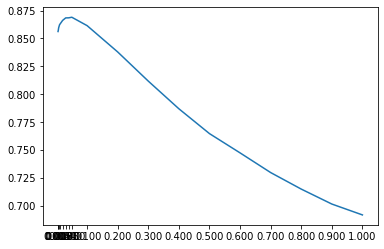

In [12]:
plt.plot(alphas,bayesArray)
plt.xticks(alphas)
plt.show()


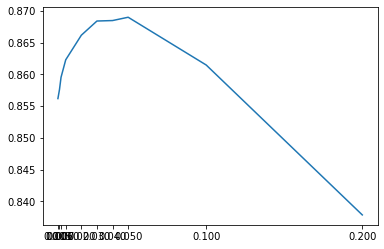

In [13]:
plt.plot(alphas[0:10],bayesArray[0:10])
plt.xticks(alphas[0:10])
plt.show()

In [14]:
model = MultinomialNB(alpha=alpha)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))

print(matrix)

0.6925801471256017
[[   96   196     0   804     0     0    20     9     1     0]
 [    0  4408     0   822     0     0    45     9     1     2]
 [    0    62   480   436     0     0   263   101     0     0]
 [    0    25     0 10711     0     0     2     1     0     9]
 [    0   292     0  1221   540     4     7    11     1     1]
 [    0   295     0  1003     0   286     9     6     0    11]
 [    0   214     0   384     0     0  3010    33     0     0]
 [    0    87     0   646     1     0    39  2468     1     3]
 [    2   197     2   557     1     0   184    28   212     0]
 [    0    25     0  2055     1     0     4    22     0   667]]


Iz matrice konfuzije primećujemo da su neka izraženija odtupanja kod klase World news, koja se pogrešno klasifikuje u oblast Politics.

U nastavku je data klasifikacija pomoću knn metode. Sa porastom broja najbližih suseda raste i preciznost modela i u našem slučaju najbolji model dobijamo za 16 suseda.

In [16]:
n_neighbors_list=list(range(1, 21))
best_acc_test=0
best_acc_train=0
best_n=None
knnArray=[]
for n_neighbors in n_neighbors_list:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_validation)
    accuracy_test = accuracy_score(y_validation,y_predict)
    knnArray.append(accuracy_test)
  #  accuracy_train = knn_model.score(X_train, y_train)
    if accuracy_test> best_acc_test:
        best_acc_test = accuracy_test
   #     best_acc_train=accuracy_train
        best_n = n_neighbors
print('Najbolji rezultat na test skupu je: ',best_acc_test)
print('Najbolji parametri modela su: ', best_n)

Najbolji rezultat na test skupu je:  0.8373341285224393
Najbolji parametri modela su:  16


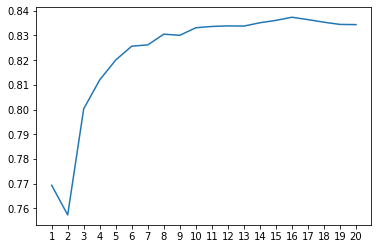

In [17]:
plt.plot(n_neighbors_list,knnArray)
plt.xticks(n_neighbors_list)
plt.show()


In [18]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=best_n)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))
print(matrix)

0.8409469318560228
[[  875    70    17    72    10     3    24    14    39     2]
 [   33  4609    11   348    37    46   135    40    11    17]
 [   10    40  1097    61     4     6    65    42    11     6]
 [    7   140     6 10189    49    39    20    51     1   246]
 [   24   190    10   325  1378    23    28    34    24    41]
 [    6   131     3   221    21  1167     7    15     3    36]
 [   20   291    39   125    12    12  3048    69    17     8]
 [   10   104    45   187    15    21    82  2704    18    59]
 [   68    73    22    59    14     9    46    31   857     4]
 [    6    65    11   725    19    16    15    60     2  1855]]


Može se primetiti da se slične zamene klasa dešavaju kao u slučaju NB klsifikacije.

U nastavku su data dva modela, gde se gleda razlika jedne klase u odnosu na ostale i razlika izmedju dve klase. Rezultati su približno isti.

In [19]:
ovr = multiclass.OneVsRestClassifier(svm.LinearSVC())
ovr.fit(X_train, y_train)
y_predicted_ovr = ovr.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovr))
print(metrics.confusion_matrix(y_test, y_predicted_ovr))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1126
           1       0.89      0.90      0.89      5287
           2       0.94      0.89      0.91      1342
           3       0.91      0.94      0.93     10748
           4       0.91      0.83      0.87      2077
           5       0.89      0.84      0.86      1610
           6       0.92      0.92      0.92      3641
           7       0.90      0.93      0.91      3245
           8       0.89      0.85      0.87      1183
           9       0.82      0.80      0.81      2774

    accuracy                           0.90     33033
   macro avg       0.90      0.87      0.88     33033
weighted avg       0.90      0.90      0.90     33033

[[  951    34     8    26     8     3    14    19    58     5]
 [   23  4761     8   218    41    55    84    47    16    34]
 [    2    16  1194    23     1     1    49    47     4     5]
 [    4   128     5 10134    63    43    10    44   

In [47]:
ovo = multiclass.OneVsOneClassifier(svm.LinearSVC())
ovo.fit(X_train, y_train)
y_predicted_ovo = ovo.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovo))
print(metrics.confusion_matrix(y_test, y_predicted_ovo))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1126
           1       0.88      0.90      0.89      5287
           2       0.94      0.87      0.91      1342
           3       0.90      0.94      0.92     10748
           4       0.92      0.82      0.87      2077
           5       0.90      0.82      0.86      1610
           6       0.91      0.91      0.91      3641
           7       0.91      0.92      0.92      3245
           8       0.88      0.84      0.86      1183
           9       0.83      0.80      0.82      2774

    accuracy                           0.90     33033
   macro avg       0.90      0.87      0.88     33033
weighted avg       0.90      0.90      0.90     33033

[[  940    52     7    30     7     2    17    15    54     2]
 [   22  4775     8   226    34    55    85    43    16    23]
 [    1    16  1174    28     2     1    67    47     3     3]
 [    4   132     2 10139    67    40    14    39   

Od isprobanih modela nešto lošije se pokazao KNN algoritam, dok su nešto bolji bili poslednja dva. Takođe poslednja dva modela smanjuju problem između problematičnih kategorija u odnosu na KNN i Bayes.

Model za 10 kategorija je pokazao najlošiju moć klasifikacije za kategoriju WorldNews. To ima smisla jer te vesti mogu biti dosta različite jer dolaze iz celog sveta. Prikazujemo neke od njih.



In [5]:
news = pd.read_json("data/News_Category_Dataset_v2.json", lines = True)
news1 = news[news.category.isin(['WORLD NEWS'])].headline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(news1.head())


11    South Korean President Meets North Korea's Kim...
23    North Korea Still Open To Talks After Trump Ca...
24    2 Men Detonate Bomb Inside Indian Restaurant N...
25    Thousands Travel Home To Ireland To Vote On Ab...
26    Irish Voters Set To Liberalize Abortion Laws I...
Name: headline, dtype: object
